In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

from sklearn.model_selection import train_test_split

In [72]:
mushrooms_df = pd.read_csv('mushrooms.csv')
mushrooms_df.rename(columns = {"class":"is-edible"}, inplace = True)
mushrooms_df.head()

,is-edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

# Data Preprocessing

## 1. Checking for Null values

In [3]:
def find_missing_values(dataframe):
    """ Find the Number of missing values in each column
    Args:
        dataframe: dataframe of which we need to find no. of missing values in each column
    Return:
        Pandas Dataframe: dataframe with columns and it's respective no. of missing values
    """
    missing_values_dict={'Columns':[],'Number of Missing Values':[]}
    for i in dataframe:
        missing_values_dict['Columns'].append(i)
        missing_values_dict['Number of Missing Values'].append(dataframe[i].isnull().sum())
    return pd.DataFrame(missing_values_dict)

In [19]:
find_missing_values(mushrooms_df)

,Columns,Number of Missing Values
0,is-edible,0
1,cap-shape,0
2,cap-surface,0
3,cap-color,0
4,bruises,0
5,odor,0
6,gill-attachment,0
7,gill-spacing,0
8,gill-size,0
9,gill-color,0


## Conclusion: No Missing values

In [21]:
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   is-edible                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## 2. Checking if the dataset is Balanced

In [22]:
# series.value_counts return a Series containing counts of unique values.
value_count = mushrooms_df['is-edible'].value_counts()
value_count

e    4208
p    3916
Name: is-edible, dtype: int64

In [23]:
for index,value in value_count.iteritems():
    print(f"{index}:{value/mushrooms_df['is-edible'].count()*100} %")

e:51.7971442639094 %
p:48.20285573609059 %


### 2.1 Visualize 
### Countplot
Countplot is a convenient tool to quickly explore the count of category variables for each unique values. 

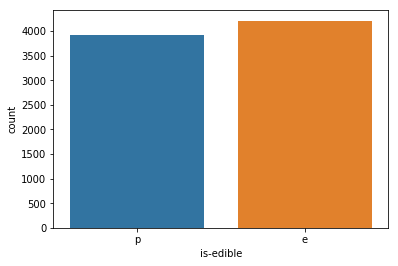

In [24]:
sns.countplot(data = mushrooms_df , x = 'is-edible' )

## Conclusion: Balanced Dataset

## 3. Checking for Redundant data

In [26]:
mushrooms_df.columns

Index(['is-edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [27]:
mushrooms_df.nunique().sort_values()

veil-type                    1
is-edible                    2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

### 3.1 Dropping constant value column 
veil-type column is dropped as it have constant value of "p" which does not bring any information about the target variable.

In [29]:
mushrooms_df.drop(columns="veil-type", inplace = True)

In [33]:
mushrooms_df.columns

Index(['is-edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [49]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2))
    chi2,p,dof,_ = ss.chi2_contingency(crosstab)
    n = np.sum(crosstab)
    phi2 = chi2/n
    r, k = crosstab.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))


In [55]:
cramers_values = []
for column in mushrooms_df.columns:
    value = cramers_V(mushrooms_df['is-edible'], mushrooms_df[column])
    cramers_values.append(round(value,2))
cramers_V_matrix = pd.DataFrame(cramers_values,columns = ['is-edible'] ,index = mushrooms_df.columns)

In [57]:
cramers_V_matrix[['is-edible']].sort_values('is-edible')

,is-edible
stalk-shape,0.10
gill-attachment,0.13
veil-color,0.15
cap-surface,0.20
ring-number,0.21
cap-color,0.22
cap-shape,0.25
gill-spacing,0.35
stalk-root,0.41
habitat,0.44


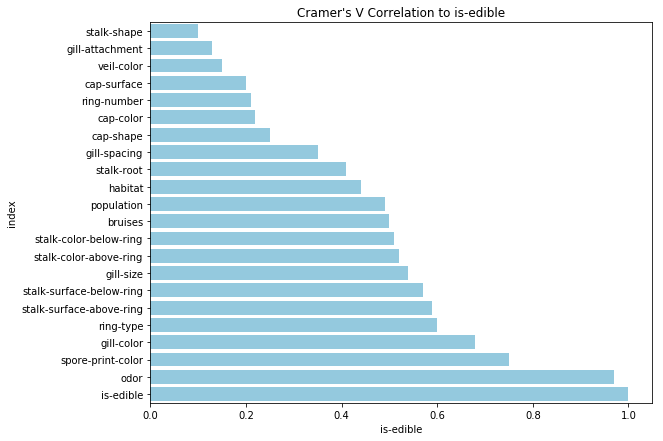

In [63]:
fig, ax = plt.subplots(figsize = (9,7))
sns.barplot(y="index", x="is-edible", data = cramers_V_matrix[['is-edible']].sort_values('is-edible').reset_index(), color = "skyblue")
plt.title("Cramer's V Correlation to is-edible")
plt.show()

In [64]:
mushrooms_df.shape

(8124, 22)

From the Cramer's V statistical test, the following are the observations:

1. Odor seems to be a strong measure as the association between odor with the target variable, is-edible is very high.
2. There seems to be little association between `['stalk-shape', 'gill-attachment', 'veil-color', 'cap-surface', 'ring-number', 'cap-color', 'cap-shape']` with target variable, `"is-edible"`.
       
    This might be due to the present of some minority classes(values with little observation) or there are simply no association.

To test out the hypothesis above, we print out the contingency table for features with low Cremer's V score and perform some basic visualisation

In [65]:
cols = ['stalk-shape', 'gill-attachment', 'veil-color', 'cap-surface', 'ring-number', 'cap-color', 'cap-shape']
for col in cols:
    display(pd.crosstab(train_df['is-edible'], train_df[col]))

stalk-shape,e,t
is-edible,,
e,1616,2592
p,1900,2016


gill-attachment,a,f
is-edible,,
e,192,4016
p,18,3898


veil-color,n,o,w,y
is-edible,,,,
e,96,96,4016,0
p,0,0,3908,8


cap-surface,f,g,s,y
is-edible,,,,
e,1560,0,1144,1504
p,760,4,1412,1740


ring-number,n,o,t
is-edible,,,
e,0,3680,528
p,36,3808,72


cap-color,b,c,e,g,n,p,r,u,w,y
is-edible,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400
p,120,12,876,808,1020,88,0,0,320,672


cap-shape,b,c,f,k,s,x
is-edible,,,,,,
e,404,0,1596,228,32,1948
p,48,4,1556,600,0,1708


By analysing the printed cross-tab the following are the observations:

1. For the features that are flagged as weak association to the target variable, some of the values seems to be a strong split and can make up a strong feature once One-Hot Encoded (e.g. gill-attachment, veil-color, ring-number, cap-shape)
2. However, there are also features where all the values are ambiguous in classifying the target variable.(e.g. stalk-shape, cap-surface) Although there might be some hidden relationship when we take account of combination for more than one features, we first attempt to **drop `["stalk-shape", "cap-surface"]` features** from our dataset and revisit the decision after modelling.

In [67]:
mushrooms_df.drop(columns = ["stalk-shape", "cap-surface"], inplace = True)


In [69]:
mushrooms_df.shape

(8124, 20)

## 4. Splitting Dataset

In [74]:
train_df, test_df = train_test_split(mushrooms_df, test_size = 0.3, random_state = 12)

In [75]:
train_df.shape, test_df.shape

((5686, 23), (2438, 23))

## 5. Feature Encoding (Dummies Encoding + One-Hot Encoding)
For starter, we will perform one-hot encoding for Nominal Categorical Columns(>2 Unique Values) to encode our features and target variable into values of 0 and 1.
Dummies Encoding is then used to encode Binary Columns(Unique Values = 2) with `drop=first` flag to avoid high correlation between encoded features

In [76]:
binary_col = train_df.columns[train_df.nunique() == 2]
categorical_col = [col for col in train_df.columns if col not in binary_col]

dummy_encode_train = pd.get_dummies(train_df[binary_col], drop_first= True, prefix_sep="-") #dummy encode for binary features
onehot_encode_train = pd.get_dummies(train_df[categorical_col], drop_first= False, prefix_sep="-") #onehot encode for categorical features

dummy_encode_test = pd.get_dummies(test_df[binary_col], drop_first= True, prefix_sep="-") #dummy encode for binary features
onehot_encode_test = pd.get_dummies(test_df[categorical_col], drop_first= False, prefix_sep="-") #onehot encode for categorical features

train_onehot = pd.concat([dummy_encode_train, onehot_encode_train], axis = 1)
test_onehot = pd.concat([dummy_encode_test, onehot_encode_test], axis = 1)

display(train_onehot)
display(test_onehot)

,is-edible-p,bruises-t,gill-attachment-f,gill-spacing-w,gill-size-n,stalk-shape-t,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
3366,1,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7200,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5898,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7236,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5655,1,1,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,1,0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3325,0,1,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1414,0,0,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5787,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


,is-edible-p,bruises-t,gill-attachment-f,gill-spacing-w,gill-size-n,stalk-shape-t,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
61,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2366,0,1,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5161,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7582,1,0,1,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
6932,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,0,1,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
583,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6073,1,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2024,0,1,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


## Splitting Features and Target Variable
After one-hot encoding, we split our training and testing set into X_train, X_test, y_train, y_test.

In [78]:
X_train, y_train = train_onehot.drop(columns = 'is-edible-p'), train_onehot['is-edible-p']
X_test, y_test = test_onehot.drop(columns = 'is-edible-p'), test_onehot['is-edible-p']
display(X_train)
display(X_test)

,bruises-t,gill-attachment-f,gill-spacing-w,gill-size-n,stalk-shape-t,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,cap-shape-s,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
3366,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7200,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5898,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7236,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5655,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3325,1,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1414,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5787,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


,bruises-t,gill-attachment-f,gill-spacing-w,gill-size-n,stalk-shape-t,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,cap-shape-s,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
61,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2366,1,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5161,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7582,0,1,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
6932,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,1,1,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
583,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6073,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2024,1,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [102]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree._export import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, auc, roc_curve

ModuleNotFoundError: No module named 'sklearn.tree._export'

In [101]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
yhat_train = model.predict(X_train)
acc_train = accuracy_score(y_train, yhat_train)
f1_train = f1_score(y_train, yhat_train)
        

/usr/lib/python3/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [93]:
acc_train

1.0

In [96]:
for i in yhat_train:
    print(i)

1
0
0
0
1
1
0
0
1
1
1
1
0
0
0
1
1
1
0
0
1
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
0
0
0
0
1
1
1
0
1
0
1
0
1
0
0
0
1
0
0
1
0
1
1
0
0
1
1
0
1
1
0
1
1
0
1
0
1
0
0
1
1
0
1
0
1
0
0
1
0
1
1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
0
1
0
1
1
0
0
0
0
1
0
1
1
1
0
1
0
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
1
1
0
1
0
0
0
1
0
0
1
1
1
0
1
0
0
0
1
0
0
0
0
0
1
1
1
1
0
0
1
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
0
1
0
1
1
1
1
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
1
1
0
1
0
0
1
0
0
1
1
0
0
0
1
0
1
1
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
1
0
0
0
0
1
1
0
1
0
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
1
0
1
0
1
1
0
1
0
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
1
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
1
1
0
0
1
1
1
1
0
1
1
0
1
0
1
1
1
0
0
1
1
1
1
1
1
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
0
1
1
0
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
1
1
1
1
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
0
1
1
1
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
0
0
1
0
1
1
1
0
1
1
0
0
0
1


0
0
1
1
1
1
1
0
0
0
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
1
1
1
1
0
1
0
0
1
1
1
1
0
0
1
0
0
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
0
0
1
1
0
0
0
0
0
1
1
1
0
0
0
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
0
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
1
0
1
1
1
0
1
0
0
1
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
1
1
0
0
1
1
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
1
0
1
0
0
0
0
1
0
1
1
1
0
1
1
0
1
0
1
1
0
0
0
0
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
0
1
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
1
0
1
1
0
1
0
1
0
0
0
0
0
1
1
1
0
0
0
1
0
1
1
0
0
1
0
0
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
1
1
0
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
1
1
1
0
1
0
1
1
0
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
0
1
1
1
0
1
0


In [91]:
f1_train

1.0

NameError: name 'plot_tree' is not defined

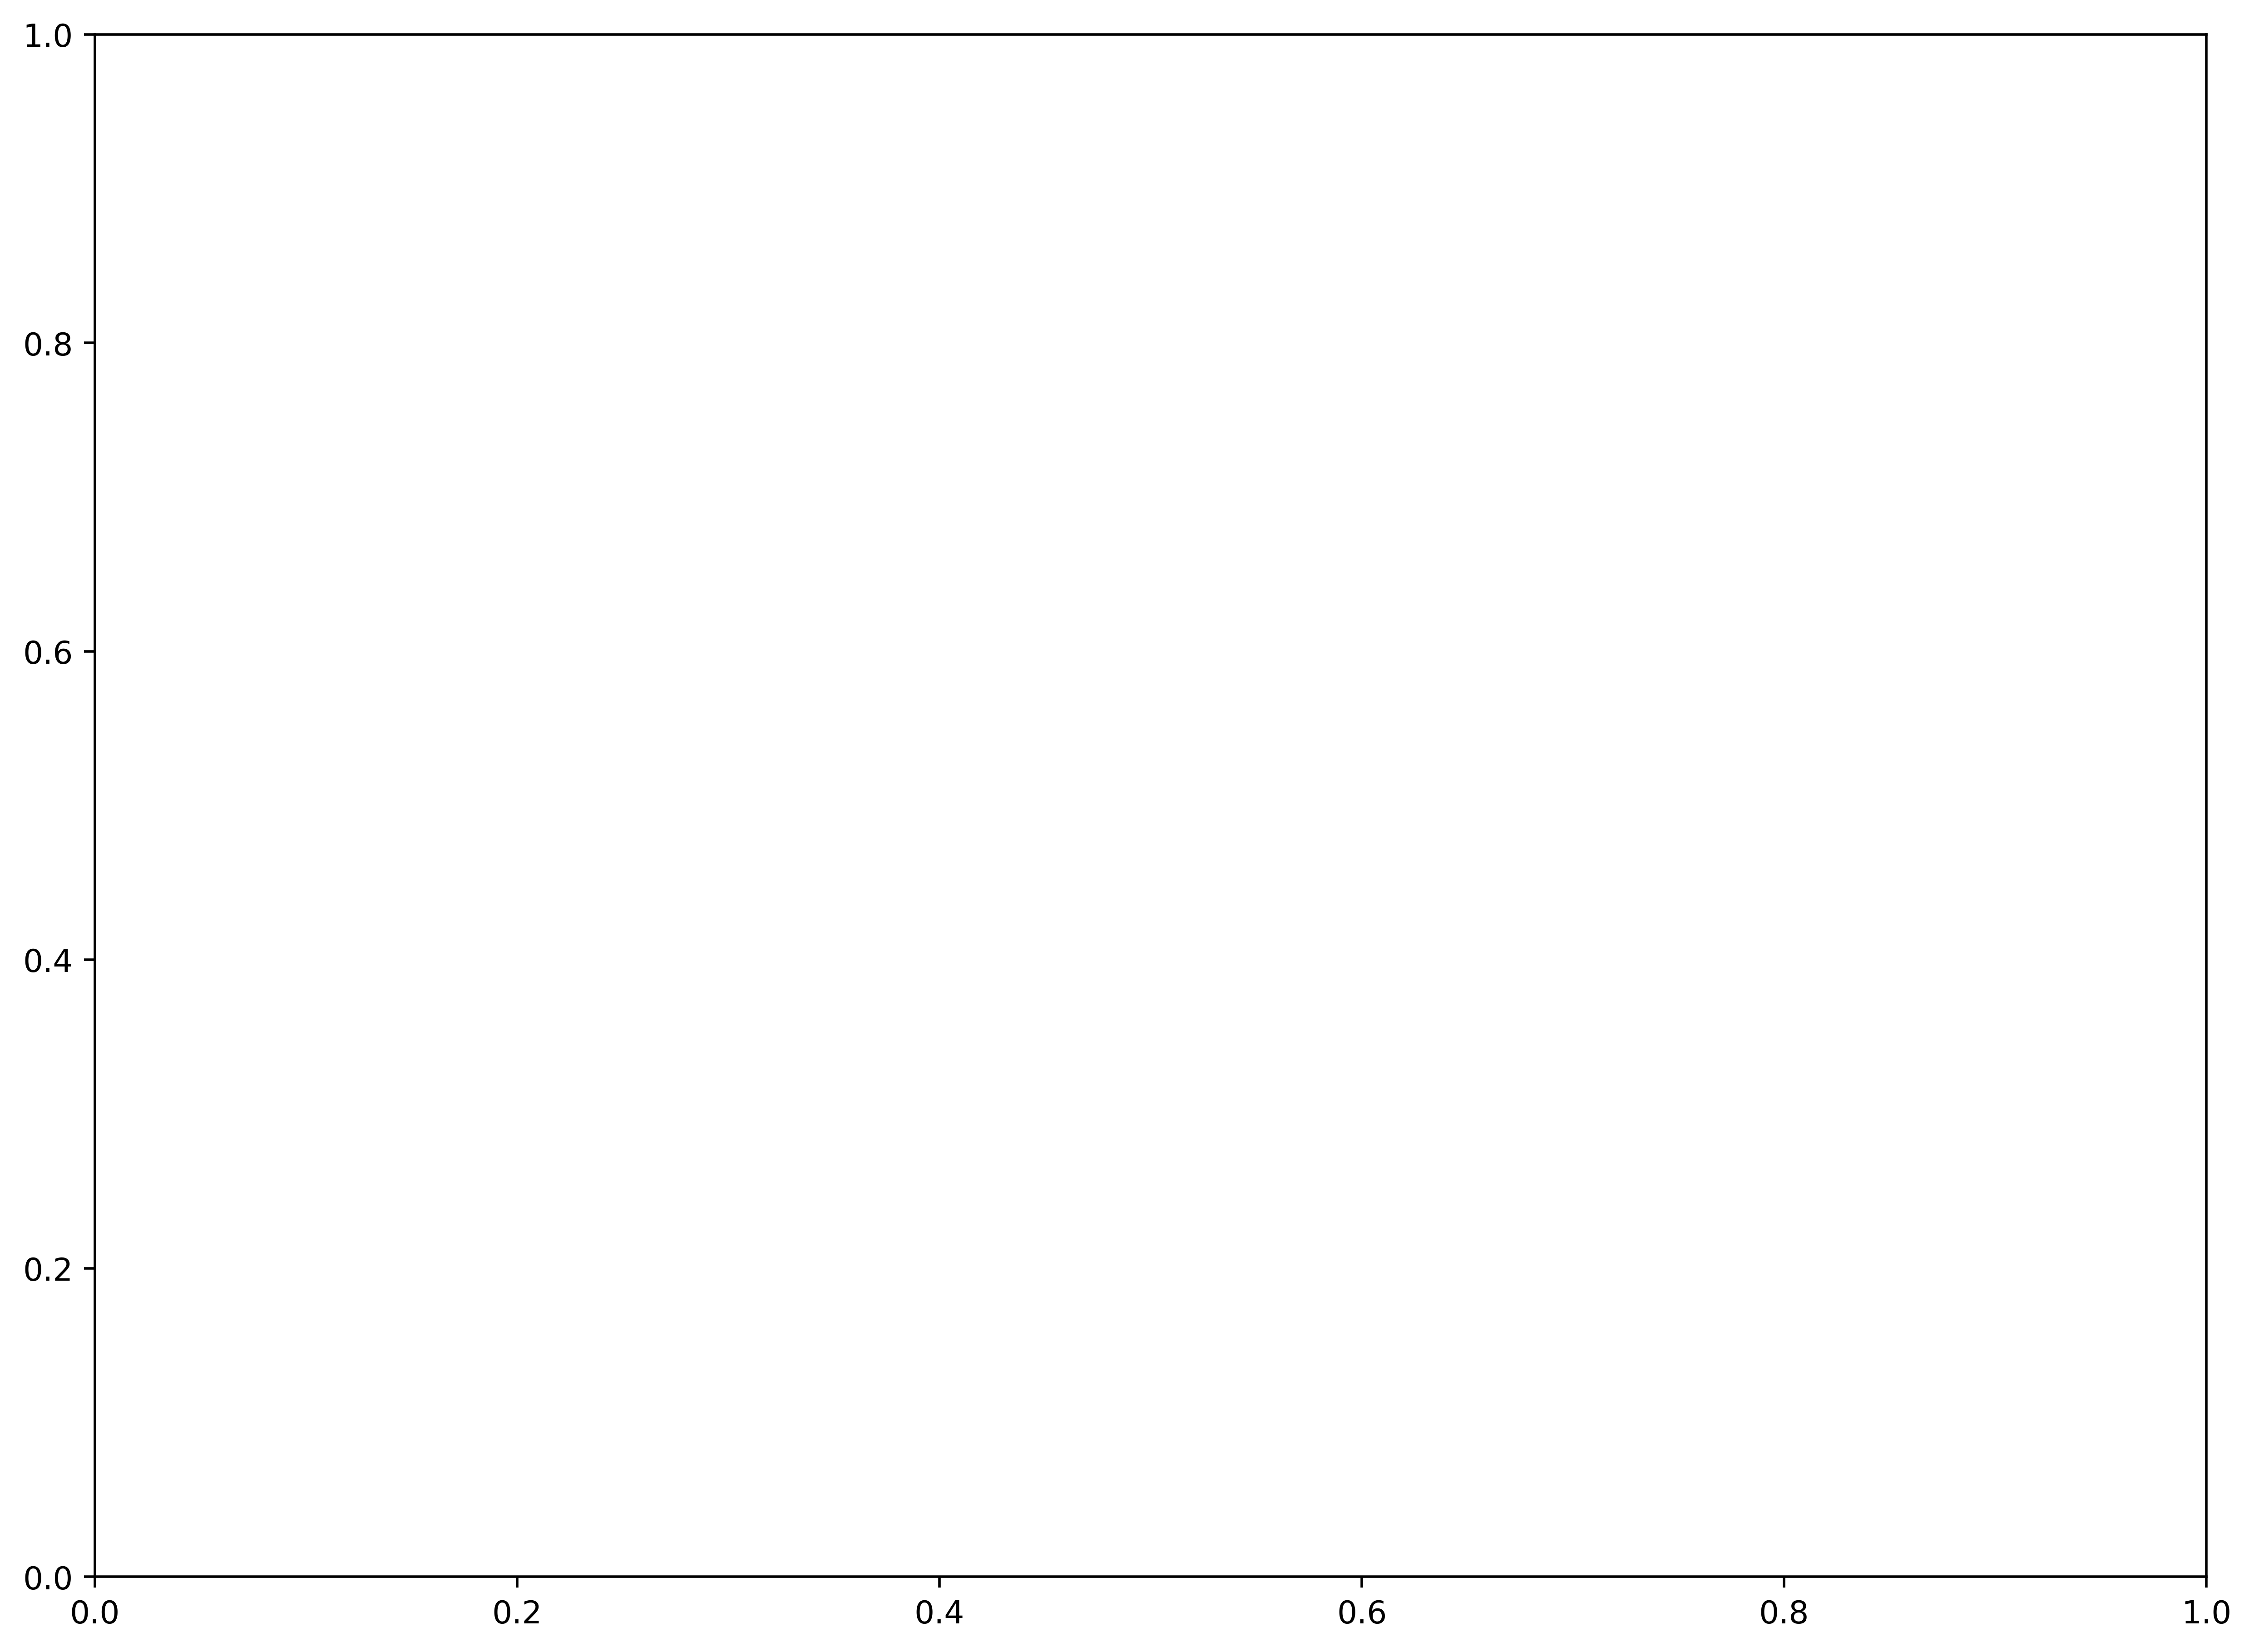

In [97]:
fig, axes = plt.subplots(figsize = (12,9), dpi=500)
plot_tree(final_model, feature_names = X_train.columns, fontsize=7)
plt.show()